In [9]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python

!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44

Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Gui-ba0a2070.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5XcbQpa-ca221f44.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/d

     |████████████████████████████████| 55.7 MB 1.3 MB/s 


In [102]:
def matcher(des1, des2, kp1, kp2, topn=11):
    matcher = cv.BFMatcher(normType=cv.NORM_L1)
    matches = matcher.match(des1,des2)
    top_matches = sorted(matches, key = lambda x : x.distance)[:topn]
    matched_image = cv.drawMatches(img1,kp1,img2,kp2,top_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_image

In [103]:
def custom_matcher(des1, des2, kp1, kp2, topn=11):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
    top_matches = sorted(matches, key = lambda x : x.distance)[:topn]
    matched_image = cv.drawMatches(img1,kp1,img2,kp2,top_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_image

In [104]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('/content/Bird.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/Birg-rotated.jpg',cv.IMREAD_GRAYSCALE)
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

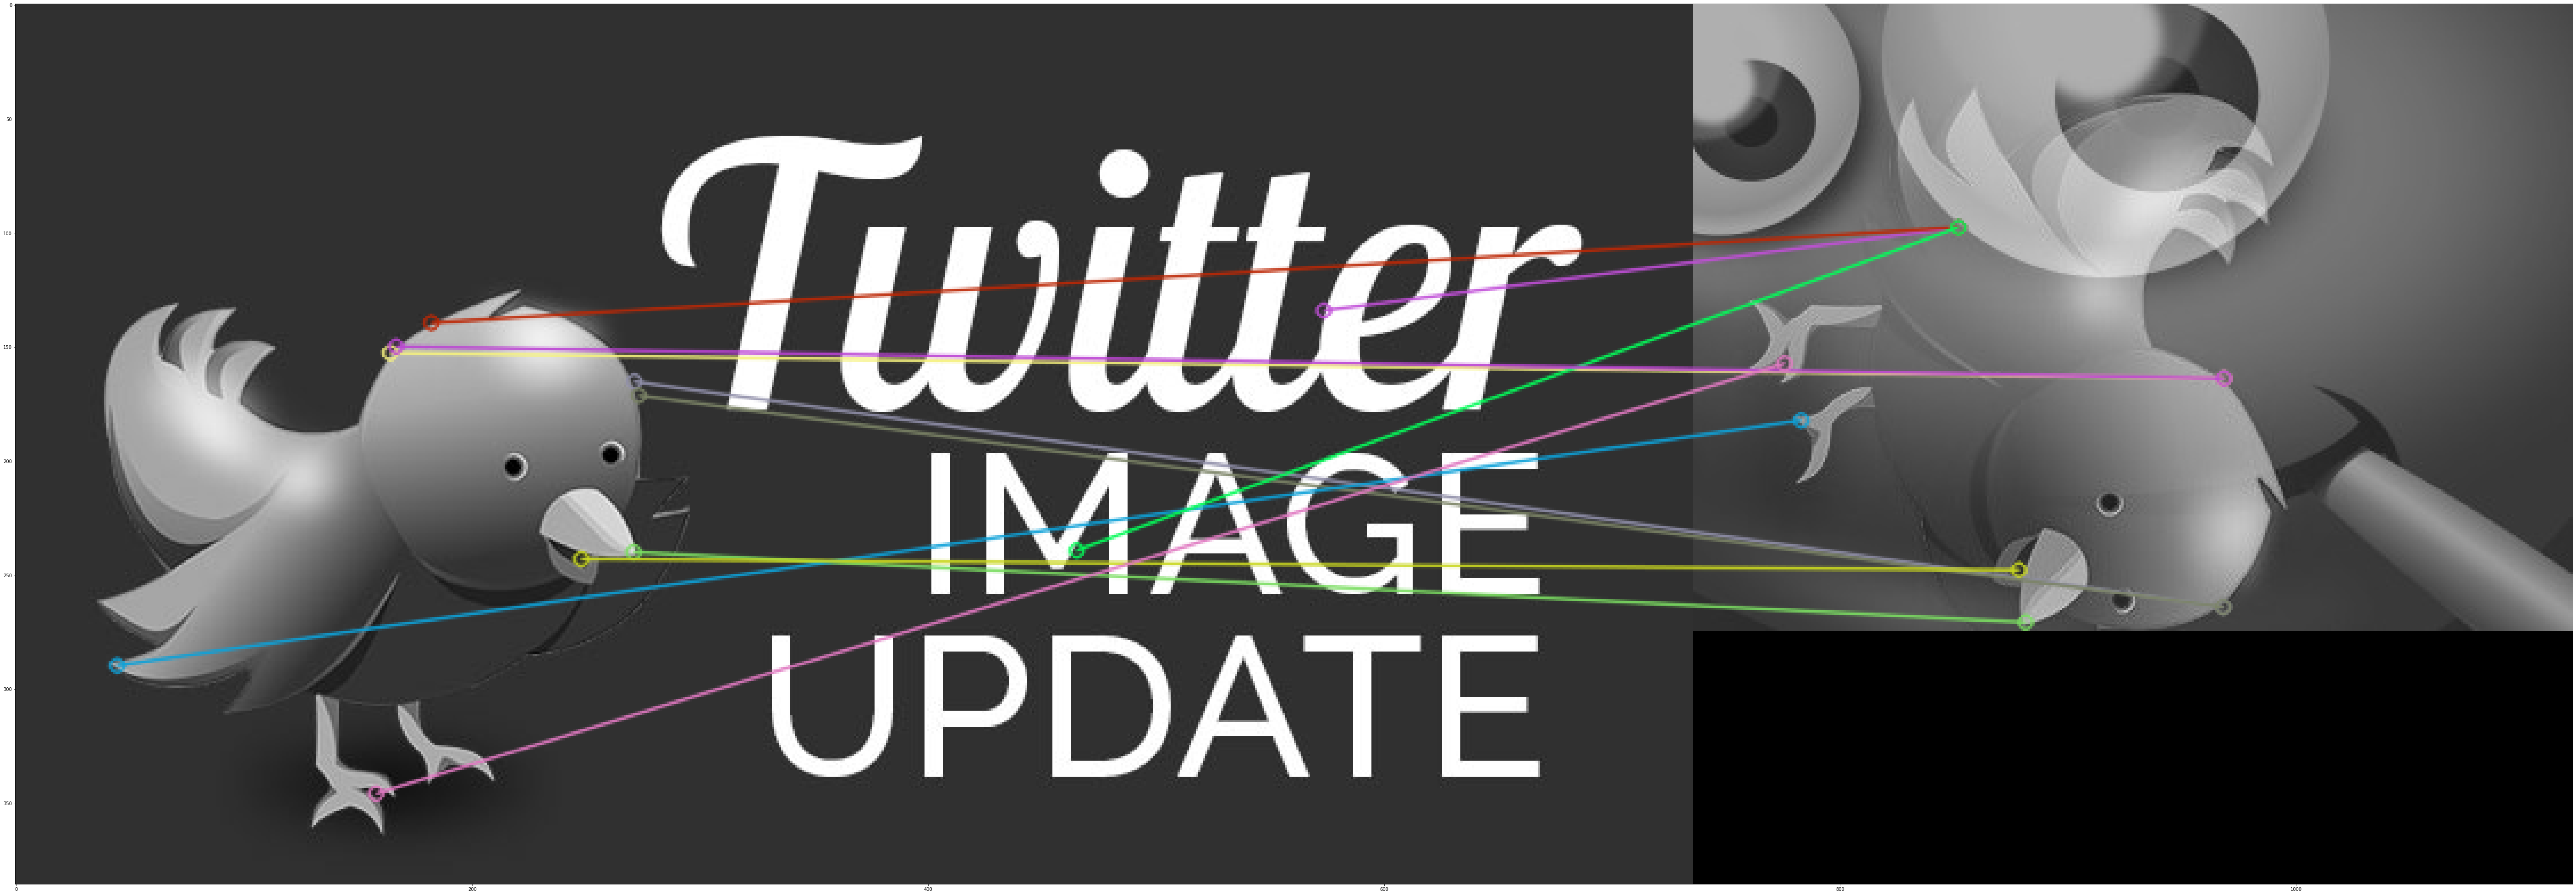

(<matplotlib.image.AxesImage at 0x7fb36b9fb910>, None)

In [105]:
cv_bf_img = matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(100,100))
plt.imshow(cv_bf_img),plt.show()

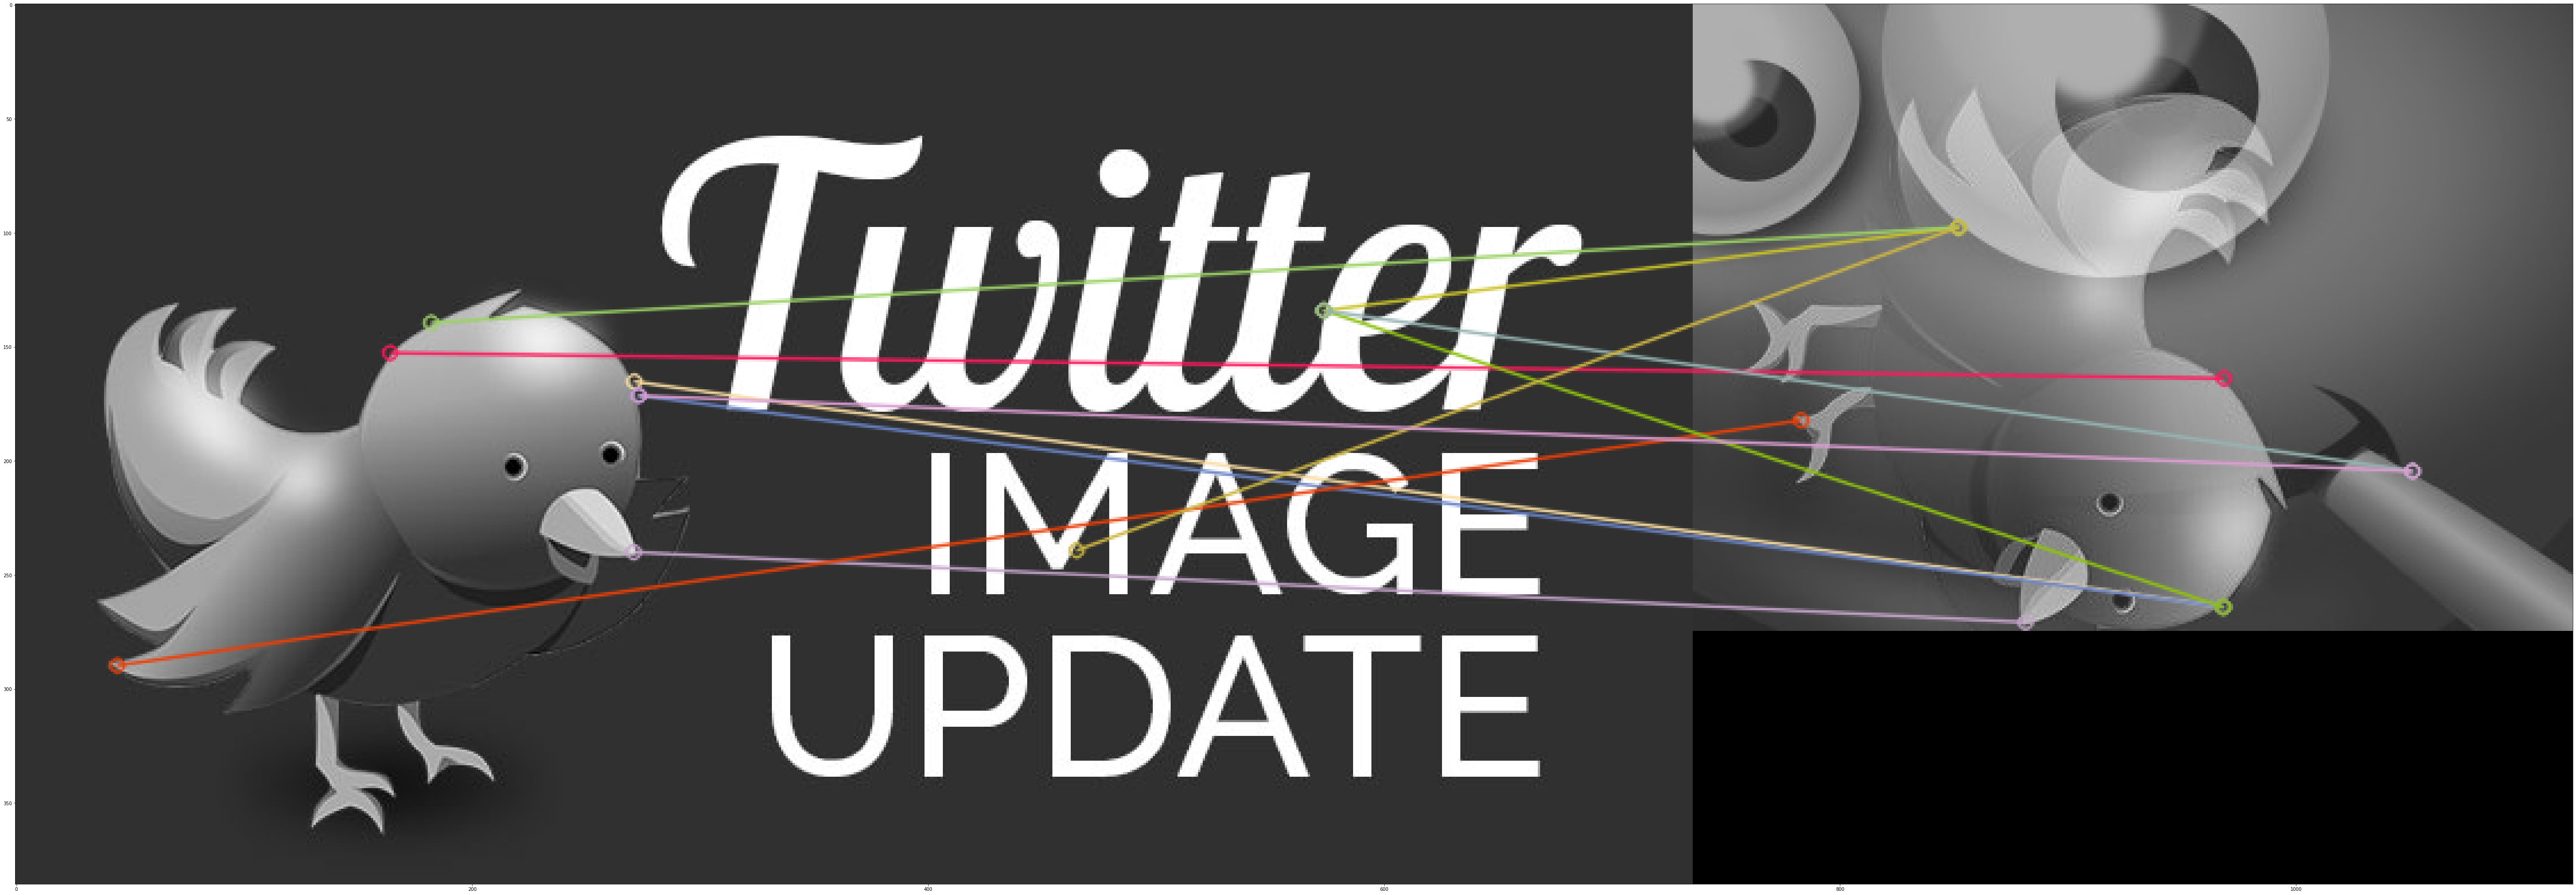

(<matplotlib.image.AxesImage at 0x7fb36bf65e10>, None)

In [106]:
custom_bf_img = custom_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(100,100))
plt.imshow(custom_bf_img),plt.show()

In [107]:
img1 = cv.imread('/content/pic-2-new.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/pic-2.jpg',cv.IMREAD_GRAYSCALE)
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

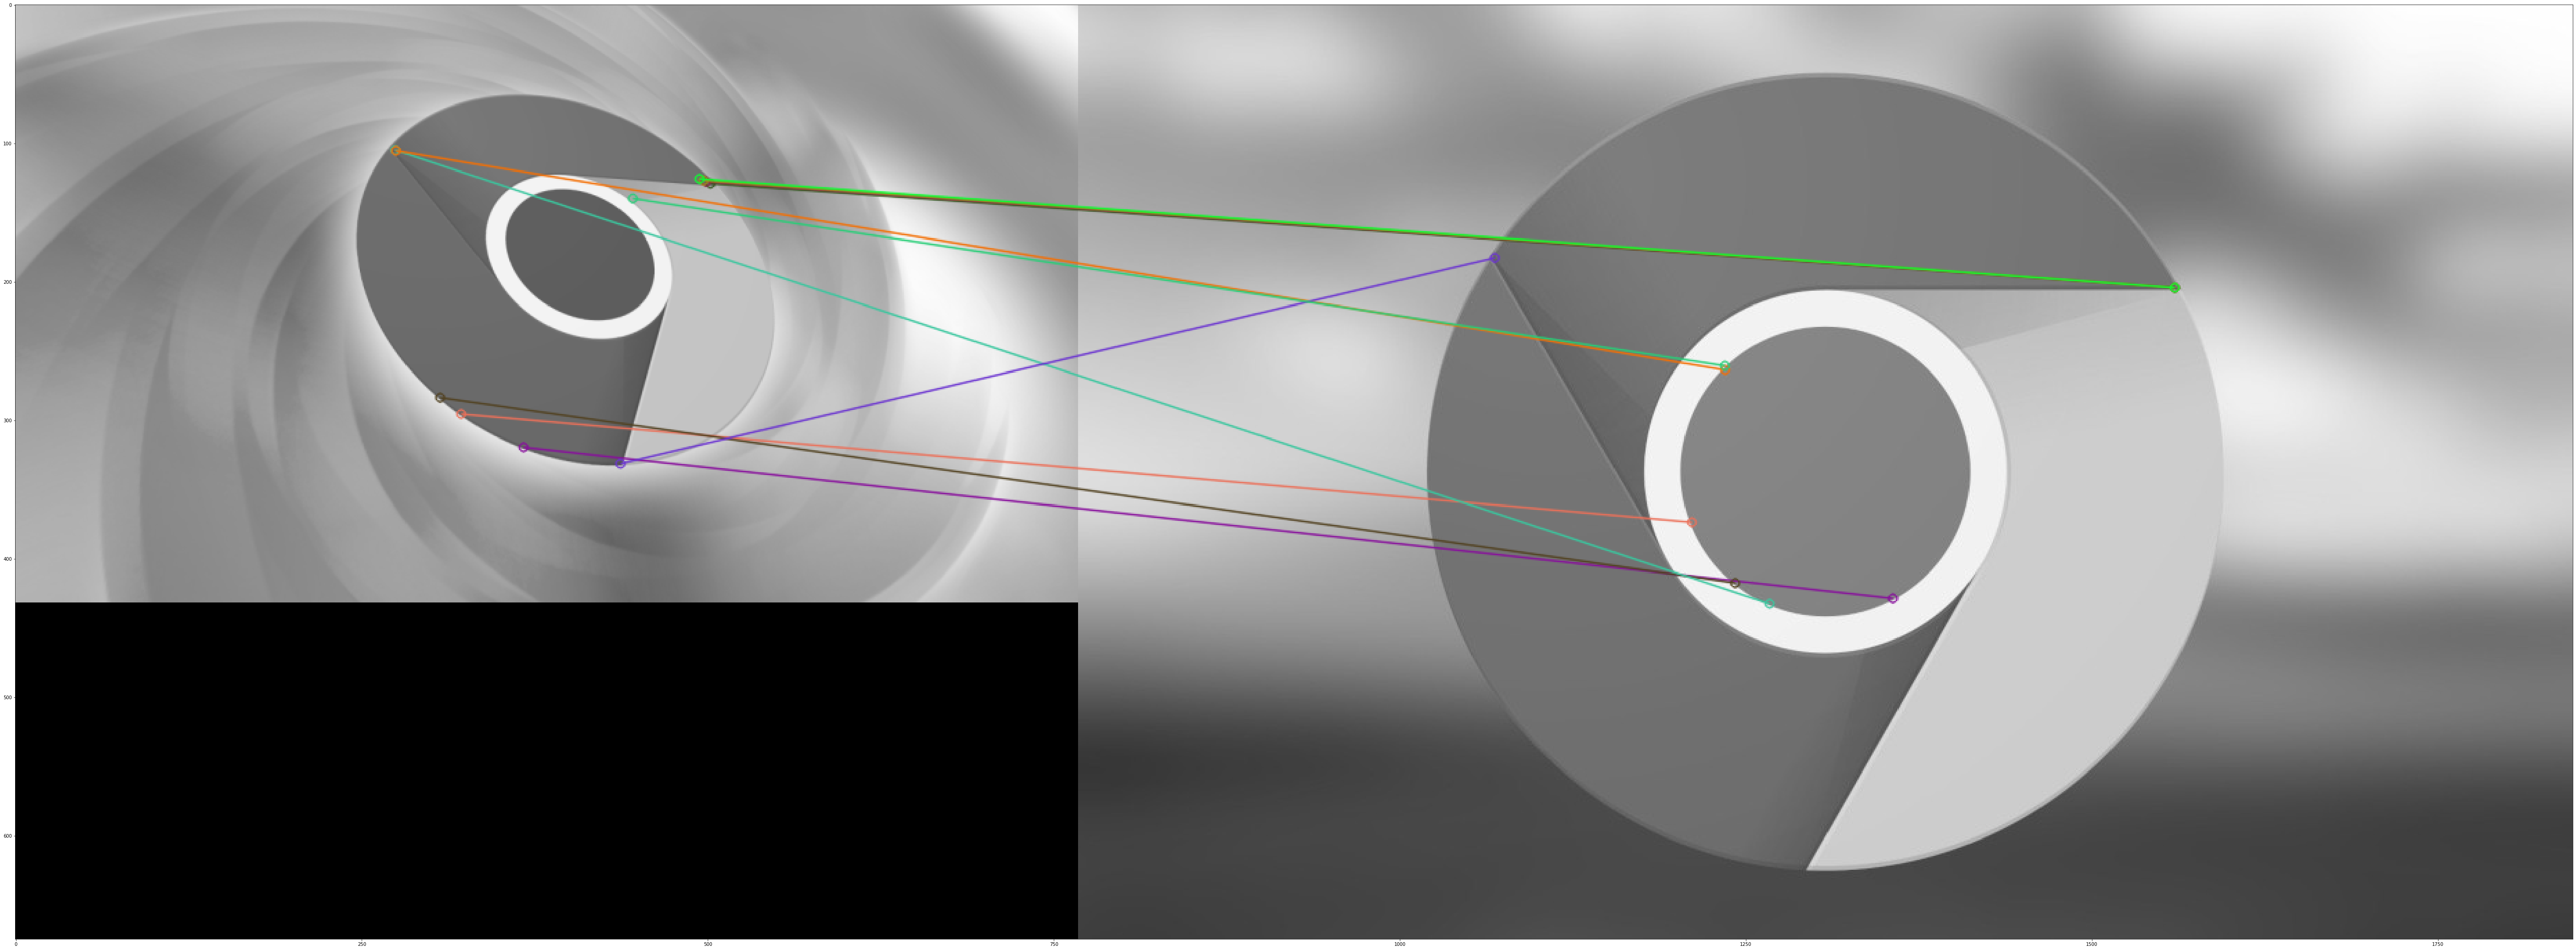

(<matplotlib.image.AxesImage at 0x7fb36b388f50>, None)

In [108]:
cv_bf_img = matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(100,100))
plt.imshow(cv_bf_img),plt.show()

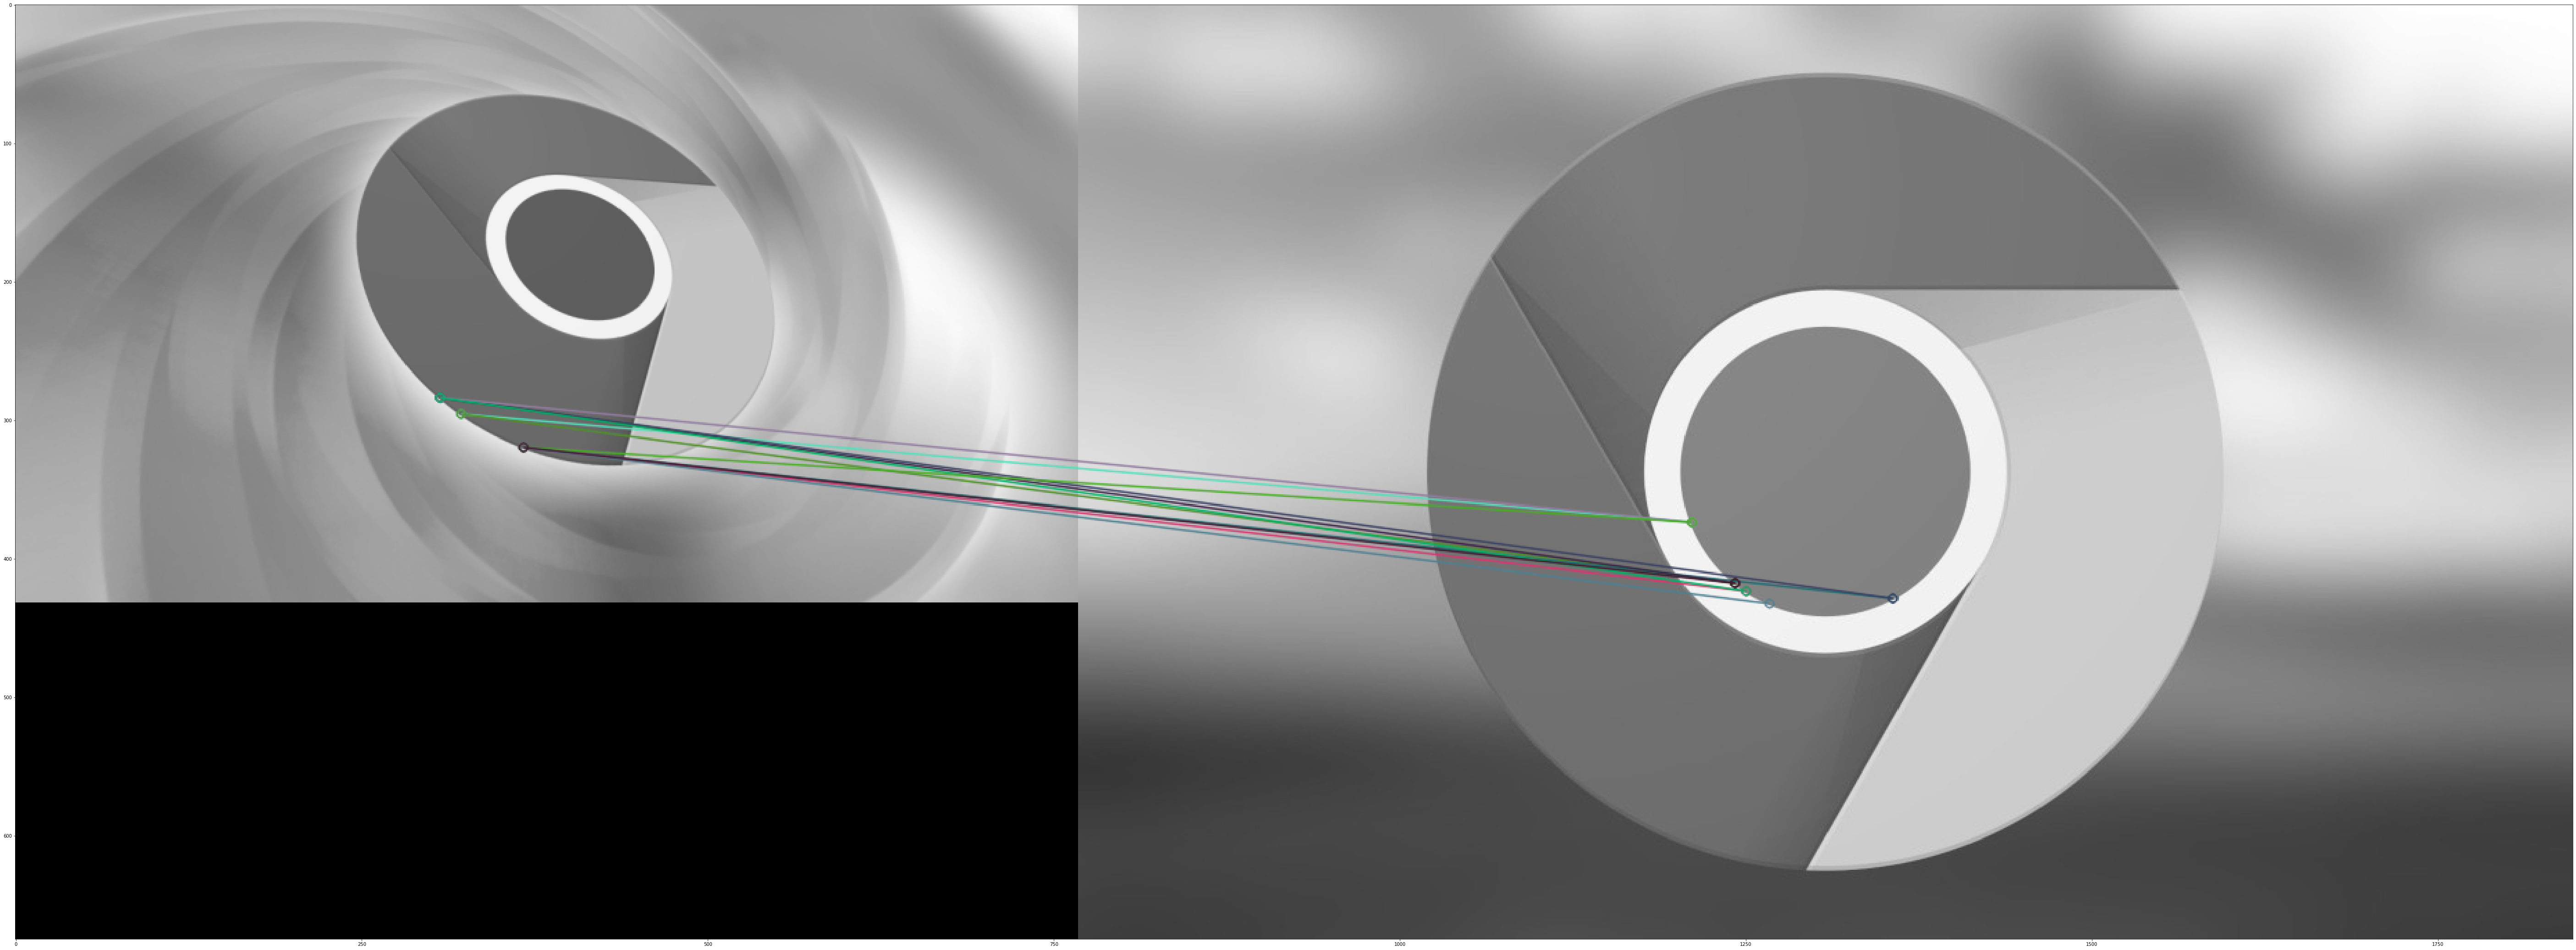

(<matplotlib.image.AxesImage at 0x7fb35f41a650>, None)

In [109]:
custom_bf_img = custom_matcher(des1, des2, kp1, kp2)
plt.figure(figsize=(100,100))
plt.imshow(custom_bf_img),plt.show()